# Project: Overview on the Egyptian Economy (1961-2020)

## Table of Contents

<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusion</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

### 1.1. Project Goal
This project takes a look at the economiy in Egypt during the period (1961-2020), using four main economic indicators: *Gross Domestic Product, Income per person, Inflation rate, Income Inequality rate*, aiming to display trends, explore relationships, and perhaps predict some upcoming future values.


### 1.2. Data Description
All indicators were collected from [Gapminder](https://www.gapminder.org/data/) in CSV format:
- **GDP Growth** (`gdp`)
     - Measures overall domestic production, it functions as a comprehensive scorecard of a given country’s economic health. 
     - Gross domestic product is the total monetary or market value of all the finished goods and services produced within a country’s borders in a specific time period. 
     - In billions of dollars (2005)
     
     
- **Inflation Rate** (`inflation`)
    - Measures the overall impact of price changes for a diversified set of products and services, and allows for a single value representation of the increase in the price level of goods and services in an economy over a period of time. 
    - Inflation is the rate at which the value of a currency is falling and, consequently, the general level of prices for goods and services is rising.
    - As a ratio of GDP (0-100%) 


- **Income** (`income`)
    - Measures of the amount of money earned per person in a nation or geographic region.
    - It's used to determine the average per-person income for an area and to evaluate the standard of living and quality of life of the population. It's calculated by dividing the country's national income by its population.
    - In dollars (2011)
    
    
- **Income Inequality: Gini Coefficient** (`gini`)
    - Measures the income inequality or the wealth inequality within a nation or a social group.
    - A Gini coefficient of zero expresses perfect equality, where all values are the same (e.g. where everyone has the same income), while a Gini coefficient of one (or 100%) expresses maximal inequality.
    - 0-100
 

In [23]:
# Import needed libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from pandas_profiling import ProfileReport
from functools import reduce
import plotly.express as px
import chart_studio.plotly #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Make sure matplotlib graphs are shown inline with output
%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling
### 2.1. Gathering

This is the first step of wrangling data, at which 3 different data sources will be used to collect 3 different file formats. Then import each into a Pandas dataframe to assess in the next step.

<a id='wrangling'></a>

In [2]:
# Load data
gdp = pd.read_csv('total_gdp_us_inflation_adjusted.csv')
inflation = pd.read_csv('inflation_annual_percent.csv')
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
gini = pd.read_csv('gini_coefficient.csv')

In [6]:
# Check if data was successfully loaded
gini.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2
1,Angola,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
2,Albania,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,...,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7
3,Andorra,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
4,United Arab Emirates,39.8,39.8,39.8,39.8,39.8,39.8,39.8,39.7,39.7,...,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9


<a id='eda'></a>

### 2.2. Assessing
This is the second step of wrangling data where the inspection of our collected data sets from both the Quality and Tidiness perspectives will be conducted.

First of all, I expect to have one major tidiness issue since I'm only interested in Egypt data, while these dataframes include data for different countries. So in this step, I'll look for data issues taking into consideration this significant point.


In [7]:
# Check GDP dataframe
gdp[gdp.country == 'Egypt']

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
55,Egypt,20.3B,21.3B,22.2B,24.5B,27.3B,28.7B,30.1B,30.4B,29.9B,...,294B,300B,307B,316B,329B,344B,358B,377B,398B,412B


In [8]:
# Check Inflation Rate dataframe
inflation[inflation.country == 'Egypt']

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
56,Egypt,1.61,0.396,0.915,0.862,5.46,2.75,2.83,1.8,0.806,...,11.7,19.5,8.71,11.2,9.93,6.25,22.9,21.4,13.6,5.59


In [9]:
# Check income dataframe
income[income.country == 'Egypt']

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
51,Egypt,1110,1110,1110,1110,1110,1110,1110,1110,1110,...,20.9k,21.3k,21.8k,22.2k,22.7k,23.2k,23.7k,24.2k,24.7k,25.2k


In [10]:
# Check gini dataframe
gini[gini.country == 'Egypt']

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
51,Egypt,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,...,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0


Seems like all is good *so far*. So the plan is to take care of the main tidiness issue first, then adjust other quality issues related to deletion of unrequired rows or renaming variables.



### 2.3. Cleaning
This is the third step of wrangling data where the inspection is put into action, using the *define-code-test* approach. But before efore beginning in this cleaning process, should create a copy of each data table as a best practice.

In [3]:
# Create copies of the original dataframes to avoid data loss
clean_gdp = gdp.copy()
clean_inflation = inflation.copy()
clean_income = income.copy()
clean_gini = gini.copy()

In [12]:
#Check everything is successfully loaded
clean_gini.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2
1,Angola,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
2,Albania,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,...,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7
3,Andorra,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
4,United Arab Emirates,39.8,39.8,39.8,39.8,39.8,39.8,39.8,39.7,39.7,...,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9


### 2.3.1. Tidiness Issues
#### Define:
- Extract only Egypt data into one dataframe
- Transpose the dataframe so years are in rows while indicators values are in columns
- Filter out only the following years: 1961-2020

#### Code:

In [4]:
# Drop all rows, but Egypt row in all dataframes
clean_gdp = gdp[gdp.country == 'Egypt']
clean_inflation = inflation[inflation.country == 'Egypt']
clean_income = income[income.country == 'Egypt']
clean_gini = gini[gini.country == 'Egypt']

#Test
clean_inflation

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
56,Egypt,1.61,0.396,0.915,0.862,5.46,2.75,2.83,1.8,0.806,...,11.7,19.5,8.71,11.2,9.93,6.25,22.9,21.4,13.6,5.59


In [5]:
# Transform the table structure so it makes more sense as years in rows not columns
clean_gdp = clean_gdp.melt(id_vars=["country"], var_name="year", value_name="GDP")
clean_inflation = clean_inflation.melt(id_vars=["country"], var_name="year", value_name="inflation")
clean_income = clean_income.melt(id_vars=["country"], var_name="year", value_name="income")
clean_gini = clean_gini.melt(id_vars=["country"], var_name="year", value_name="gini_coefficient")

In [18]:
#Test
clean_inflation

,country,year,inflation
0,Egypt,1961,1.61
1,Egypt,1962,0.396
2,Egypt,1963,0.915
3,Egypt,1964,0.862
4,Egypt,1965,5.46
5,Egypt,1966,2.75
6,Egypt,1967,2.83
7,Egypt,1968,1.8
8,Egypt,1969,0.806
9,Egypt,1970,12.5


In [85]:
#Add the extracted rows together
df = pd.merge(clean_gdp, clean_inflation,
                on=['year', 'country']).merge(clean_income,
                                              on=['year', 'country']).merge(clean_gini,
                                                                            on=['year', 'country'])

#### Test:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           60 non-null     object 
 1   year              60 non-null     object 
 2   GDP               60 non-null     object 
 3   inflation         60 non-null     object 
 4   income            60 non-null     object 
 5   gini_coefficient  60 non-null     float64
dtypes: float64(1), object(5)
memory usage: 3.3+ KB


### 2.3.2. Quality Issues

#### Define:
- Eliminate `country` column to make more sense since it's all about Egypt.
- Transform datatypes to their corresponding types.

#### Code:

In [86]:
# Delete country column
del df['country']

In [87]:
#Transform indicators datatypes to float

#year
df['year'] = df['year'].astype(int)

#inflation
df['inflation'] = df['inflation'].str.replace('−', '-').astype(float)
#Edit some losses
df['inflation'][13] = 9.42
df['inflation'][18] = 23.5

#income
mp = {'k':' * 10**3', 'B':' * 10**3'} #normalize dollars in thousands
df['income'] = pd.eval(df['income'].replace(mp.keys(), mp.values(),
                                            regex=True).str.replace(r'[^\d\.\*]+','', regex=True))
df['income'] = df['income'].astype(float)

#GDP
#Adding another GDP column in dollars for consistency with income
df['GDP_thousands'] = pd.eval(df['GDP'].replace(mp.keys(), mp.values(),
                                              regex=True).str.replace(r'[^\d\.\*]+','', regex=True)).astype(float)
df['GDP'] = df['GDP'].str.replace('B', '').astype(float)
df.rename(columns={'GDP':'GDP_billions'}, inplace=True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Test:

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              60 non-null     int64  
 1   GDP_billions      60 non-null     float64
 2   inflation         60 non-null     float64
 3   income            60 non-null     float64
 4   gini_coefficient  60 non-null     float64
 5   GDP_dollars       60 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 5.3 KB


In [91]:
df.head()

,year,GDP_billions,inflation,income,gini_coefficient,GDP_dollars
0,1961,21.3,1.610,1910.0,25.4,2.130000e+10
1,1962,22.2,0.396,2010.0,25.5,2.220000e+10
2,1963,24.5,0.915,2120.0,25.6,2.450000e+10
3,1964,27.3,0.862,2230.0,25.7,2.730000e+10
4,1965,28.7,5.460,2340.0,25.7,2.870000e+10


Looks like it's all set to begin the EDA!

<a id='eda'></a>
## 3. Exploratory Data Analysis
This is the stage, I'll investigate the cleaned dataset, aiming to find some useful insights.
> Note that all of the EDA is merely tentative.


### Summary Statistics
First of all, I'll start by making a quick report to perform some intial main explorations including:

- Univariate analysis: each variable distribution
- Each variable mean, max and min
- Each variable quartiles
- Heatmap for correlation among variables
- Initial graphical exploration for possible relationships

In [10]:
profile = ProfileReport(df, title="Summary Statistics for Economy in Egypt (1961-2020)")
profile

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Interesting! It seems like our dependent variable (economic growth measured by GDP) has a positive relationship with employment, balance of trade and investment. While in the same period of time, it has a negative relationship with inflation. This only makes sense because the first 3 variables, by theory, have a positive effect on economic growth. But regarding the relationship with inflation, it gives us a major hint that inflation in Egypt isn't mainly driven by demand, but mostly with a rise in prices, because theory assumes here and I quote Prof. Colin Cavendish-Jones: "***Economic growth causes higher inflation when it is driven by demand. However, if demand and productive capacity increase at the same rate, inflation will normally remain stable. When inflation is caused solely by a rise in the cost of raw materials, it will not be accompanied by economic growth***". So let's dig deeper into this and try observing the trends in each section following the guiding questions.

/home/tima/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


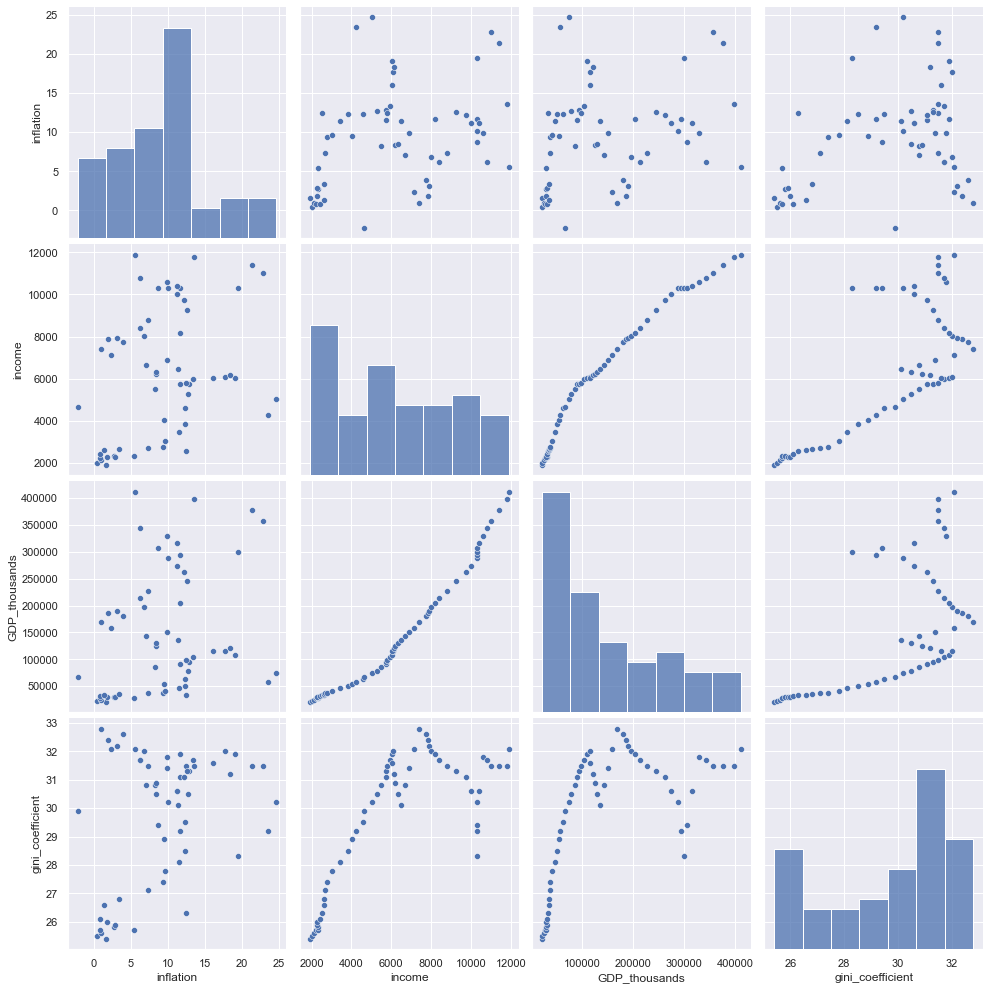

In [13]:
#Super scatterplot
sb.set()
cols = ['inflation', 'income', 'GDP_thousands', 'gini_coefficient']
sb.pairplot(df[cols], size = 3.5)
plt.show();

Although we already saw these distributions in the great portfolio earlier, this super scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between `income` and `GDP_thousands`. In this figure we can see the dots drawing almost a perfect linear line, which totally makes sense because income is derived from GDP. There's multicollinearity between them. More about how to calculate income [here](https://www.wallstreetmojo.com/personal-income/).

The plot concerning 'income' and 'gini_coefficient' can also make us think. It seems like until a certain point income inequality (measured by Gini) was increasing as income increases. However, afterwards it was affected by something (probably major political or economic events) to take an indefinite downward slope.

### Graphical Representations

#### Inflation Rate

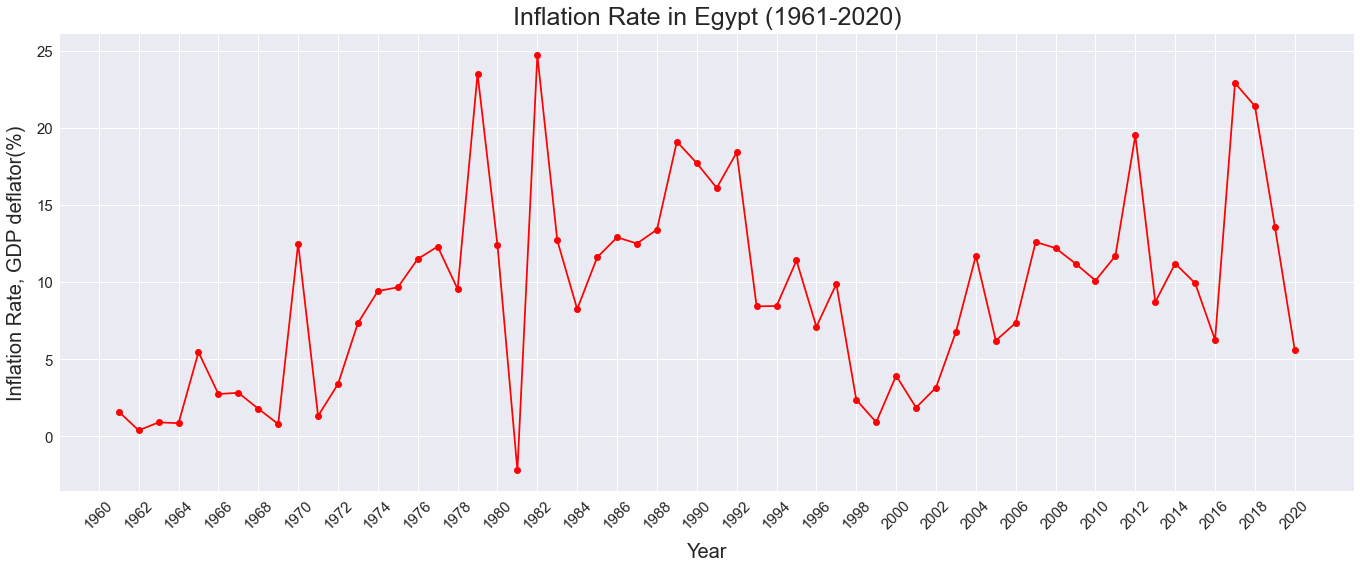

In [88]:
# Create the line plot of Inflation rate over time

plt.style.use('seaborn')

plt.figure(figsize=(19,8))
inflation_series = plt.plot(df.year, df.inflation, linestyle='solid',  marker='o', color="r")
years = np.arange(df.year.min()-1, df.year.max()+1, 2)

plt.title('Inflation Rate in Egypt (1961-2020)', fontsize=25, pad=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.xticks(years, rotation=45, fontsize=15)
plt.ylabel('Inflation Rate, GDP deflator(%)', fontsize=20, labelpad=10)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

This graph shows 3 main peaks in inflation rate, let's look at them and see if we can find any logical reasons:

- 1979: Camp David peace treaty with Israel, to stop the war. And as the war stopped, optimistim pushed the whole economy including prices above.


- 1981: The lowest point in inflation rate, when the former Egyptian president Anwar El-Sadat was killed, whichimpacted the economy causing, for the **first time** in Egypt economic history from 1961 till 2020, a negative inflation rate of -2.2%, which means that the prices of goods & dervices in 1981 got lower with 2.2% in comparison to the previous year in 1980.


- 1982: Mohammed Hosny Mubarak won the Egyptian elections, and started implementing economic reformation policies, that depend on open trade and globalizations. So, the economy florished, way too much, after a presumely recession, causing the highest inflation point in the Egyptian economy between years 1961 and 2020 of 24.5%, which means that the prices of goods and services in 1982 were 24.7% higher than prices in 1981.


- 2012: The economy suffered the consequences of the unstable political situation in Egypt, after the 25th of January revolution.


- 2017: The third highest and the most recent peak of inflation with 22.9% that came right after Egypt adapted the floating exchange rate system, with orders from the Egyptian Central Bank, as a part of economic reformation with the assistance of the [International Monetary Fund](https://en.wikipedia.org/wiki/International_Monetary_Fund).


Taking both into consideration; the graph and the summary statistics for inflation variable provided, during yearsfrom 1961 till 2020, inflation was highly fluctuating leading to unstable prices, with 9.4% on average. Meaning than on average, the prices of goods and services in the Egyptian economy incresed by 9.4% on comparison with the previous year.

In [77]:
#Preparing world inflation
inf_nan= inflation.dropna()
inf_nan['2020'] = inf_nan['2020'].str.replace('−', '-').astype(float)

#Removing outliers
inf_nan = inf_nan.drop([211], 0)
inf_nan = inf_nan.drop([165], 0)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


In [89]:
inf_nan['2020'].mean()

3.702220481927711

In [80]:
fig = px.choropleth(inf_nan, locations='country', color='2020', title='World Inflation 2020',
                    locationmode='country names', color_continuous_scale='Reds',
                    labels={'2020':'Inflation Rate'} )

fig.update_layout(title_font_size=27, title_pad=dict(l=260))
fig.show()

Now, it's apparent that Egypt has a relatively high inflation across the world in 2020. And the latest data shows an inflation of **5.59%** which lies above the world inflation average of **3.70%**.

#### Income

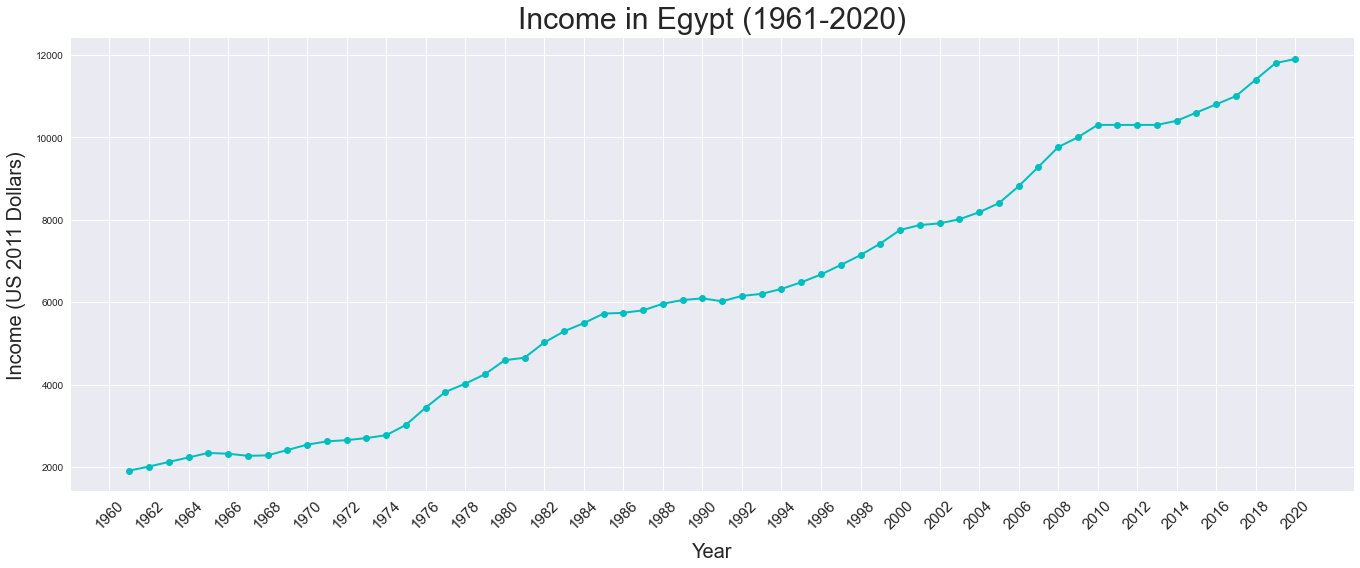

In [11]:
# Create the line plot of income over time

plt.style.use('seaborn')

plt.figure(figsize=(19,8))
income_series = plt.plot(df.year, df.income, linestyle='solid', lw=2,  marker='o', color="c")

plt.title('Income in Egypt (1961-2020)', fontsize=30, pad=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.xticks(years, rotation=45, fontsize=15)
plt.ylabel('Income (US 2011 Dollars)', fontsize=20, labelpad=10)

plt.tight_layout()
plt.show()

Due to limitations of national income as an indicator of development, economists like [Rostow](https://en.wikipedia.org/wiki/Walt_Whitman_Rostow), [Baran](https://en.wikipedia.org/wiki/Paul_A._Baran) and [Leibenstein](https://en.wikipedia.org/wiki/Harvey_Leibenstein) etc. favored the use of per capita income as an index of development. However, it should be noted that Per Capita Income has other kinds of limitations:

- Per capita income does not reflect the standard of living of the people. Per capita income is an average and this average may not represent the standard of living of the people, if the increased national income goes to the few rich instead of giving to the many poor. Thus unless national income is evenly distributed, per capita income cannot serve as a satisfactory indicator of development.


- An increase in per capita income may not raise the real standard of living of people. It is possible that while per capita real income is increasing per capita consumption of goods and services might be falling. This happens when the Govt. might itself be using up the increased income for massive military build up necessitating heavy production of arms and ammunitions.


- Although an increase in output per head is in itself a significant achievement, yet we cannot equate this with an increase in economic welfare. Let alone social welfare without additional considerations. Since development is multidimensional education, health, work-leisure ratio etc. are important considerations which do not get reflected in per capita income.

And by looking at Income Per Capita in Egypt, we can notice it's has a positive slope, increasing by time from 1961 (the lowest): 1910 US dollars to 2020 (the highest): 11,900 US dollars, with slight diversions. **But**, taking into consideration the previous limitations, this doesn't mean any actual improvement in the standard of living, nor the economic development in Egypt.

However, we can get a better understanding of the standard of living, by >>> putting this Per Capita Income, side by side to Income Inequality (expressied by Gini Coefficient) since the latter indicates how equally is the wealth in an economy distributed.

#### GDP

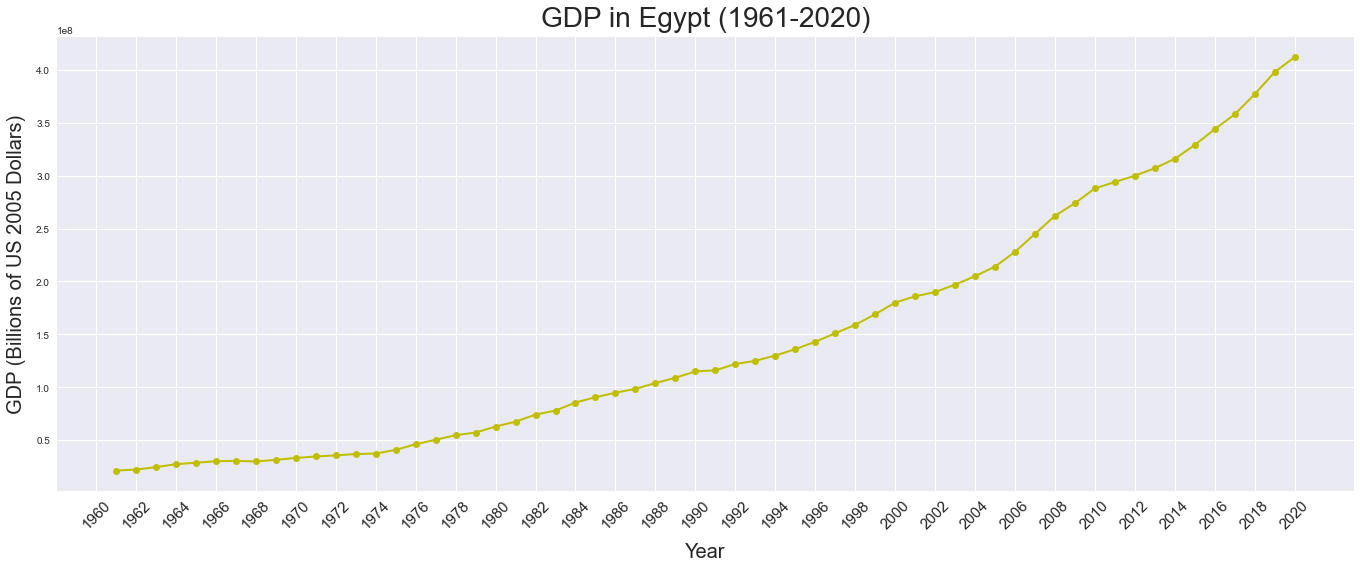

In [15]:
# Create the line plot of GDP

plt.style.use('seaborn')

plt.figure(figsize=(19,8))
gdp_series = plt.plot(df.year, df.GDP_thousands, linestyle='solid', lw=2, color="y",  marker='o')


plt.title('GDP in Egypt (1961-2020)', fontsize=28, pad=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.xticks(years, rotation=45, fontsize=15)
plt.ylabel('GDP (Billions of US 2005 Dollars)', fontsize=20, labelpad=10)

plt.tight_layout()
plt.show()

GDP equals the value of all the goods and services produced for money in an economy, evaluated at their market prices. GDP data provides an important and informative snapshot into the behaviour and performance of the overall
economy. ***How so?***

The rate of expansion of real GDP is usually interpreted as the most important measure of economic growth. A **recession** occurs when real GDP shrinks (usually, for at least two quarters in a row). Whereas a **recovery** is said to begin when real GDP starts growing again.

Accordingly, the above graph shows consistently and increasingly growing economic growth. The last recorded value of Economic growth measured by GDP is 412,000 thousands of US dollars in 2020.

However, there's one important limitation to displaying economic growth: **Underground Economy**. The underground economy (or black market) refers to cash and barter transactions that are not formally recorded in GDP and are often used to support the trade of illegal goods and services (i.e., drugs, weapons, prostitution, etc.). The scale of underground economies varies greatly between nations, and, in some cases, they make up a substantial percentage of a country’s economic output. The underground market is almost impossible to estimate or value, and due to its illegal nature, it is rarely incorporated into a nation’s published GDP figure. Thus, some nations’ economic output may be understated by GDP.

So it's safe to say that economic growth in Egypt has been growing over years 1961-2020, but not necessarily with the same percentage it's shown here.

Another significant question to ask here is: how much of this economic growth is caused by debts and loans? This factor needs to be taken into consideration, if we're looking for indication of real economic development.

#### Income Inequality

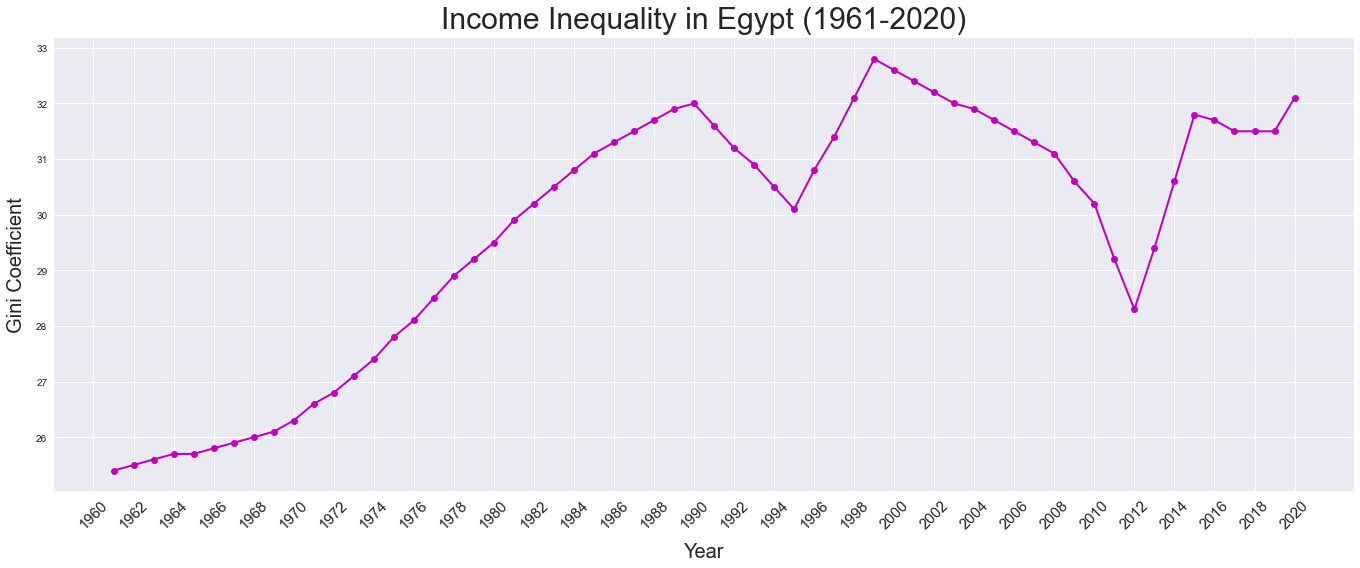

In [153]:
# Create the line plot of Income Inequality over time

plt.style.use('seaborn')

plt.figure(figsize=(19,8))
inequality_series = plt.plot(df.year, df.gini_coefficient, linestyle='solid', lw=2, color="m", marker='o')

plt.title('Income Inequality in Egypt (1961-2020)', fontsize=30, pad=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.xticks(years, rotation=45, fontsize=15)
plt.ylabel('Gini Coefficient', fontsize=20, labelpad=10)

plt.tight_layout()
plt.show()

The Gini coefficient amounts to a kind of percentage and can run from 0 to 100. A Gini of 0 represents 0 percent concentration in a country’s income distribution. In a country with a Gini coefficient of 0, everyone receives exactly the same income.

Gini coeffiicient ranges in Egypt 1961-2020 from 25.4% to 32.8%, which is relitavely low, meaning more equality distributing income, right?

While low numbers represent greater income/wealth equality, low numbers aren't always a perfect indicator of economic health. Nations such as Sweden, Belgium, and Iceland all cluster in the .20s, as do a host of former Soviet nations.4 In the former nations, the numbers are close because residents generally have a high standard of living, while in the latter the close numbers suggest a relatively equal distribution of poverty.

Still, in order to know whether Egypt is in a good place in terms of income equality, at least in the meantime, we need to take a comparative approach and display 2021 Gini Coefficient values for all world countries including Egypt.

In [82]:
#World mean
gini['2020'].mean()

38.64467005076142

In [81]:
fig = px.choropleth(gini, locations='country', color='2020', title='World Gini Coefficient 2020',
                    locationmode='country names', color_continuous_scale="Purpor",
                    labels={'2020':'Income Inequality'} )

fig.update_layout(title_font_size=27, title_pad=dict(l=220))
fig.show()

It seems like Egypt's situation on this is good, relatively speaking. In fact, it indicates **32.1** which is below world average of **38.6** in year 2020.

#### GDP & Income

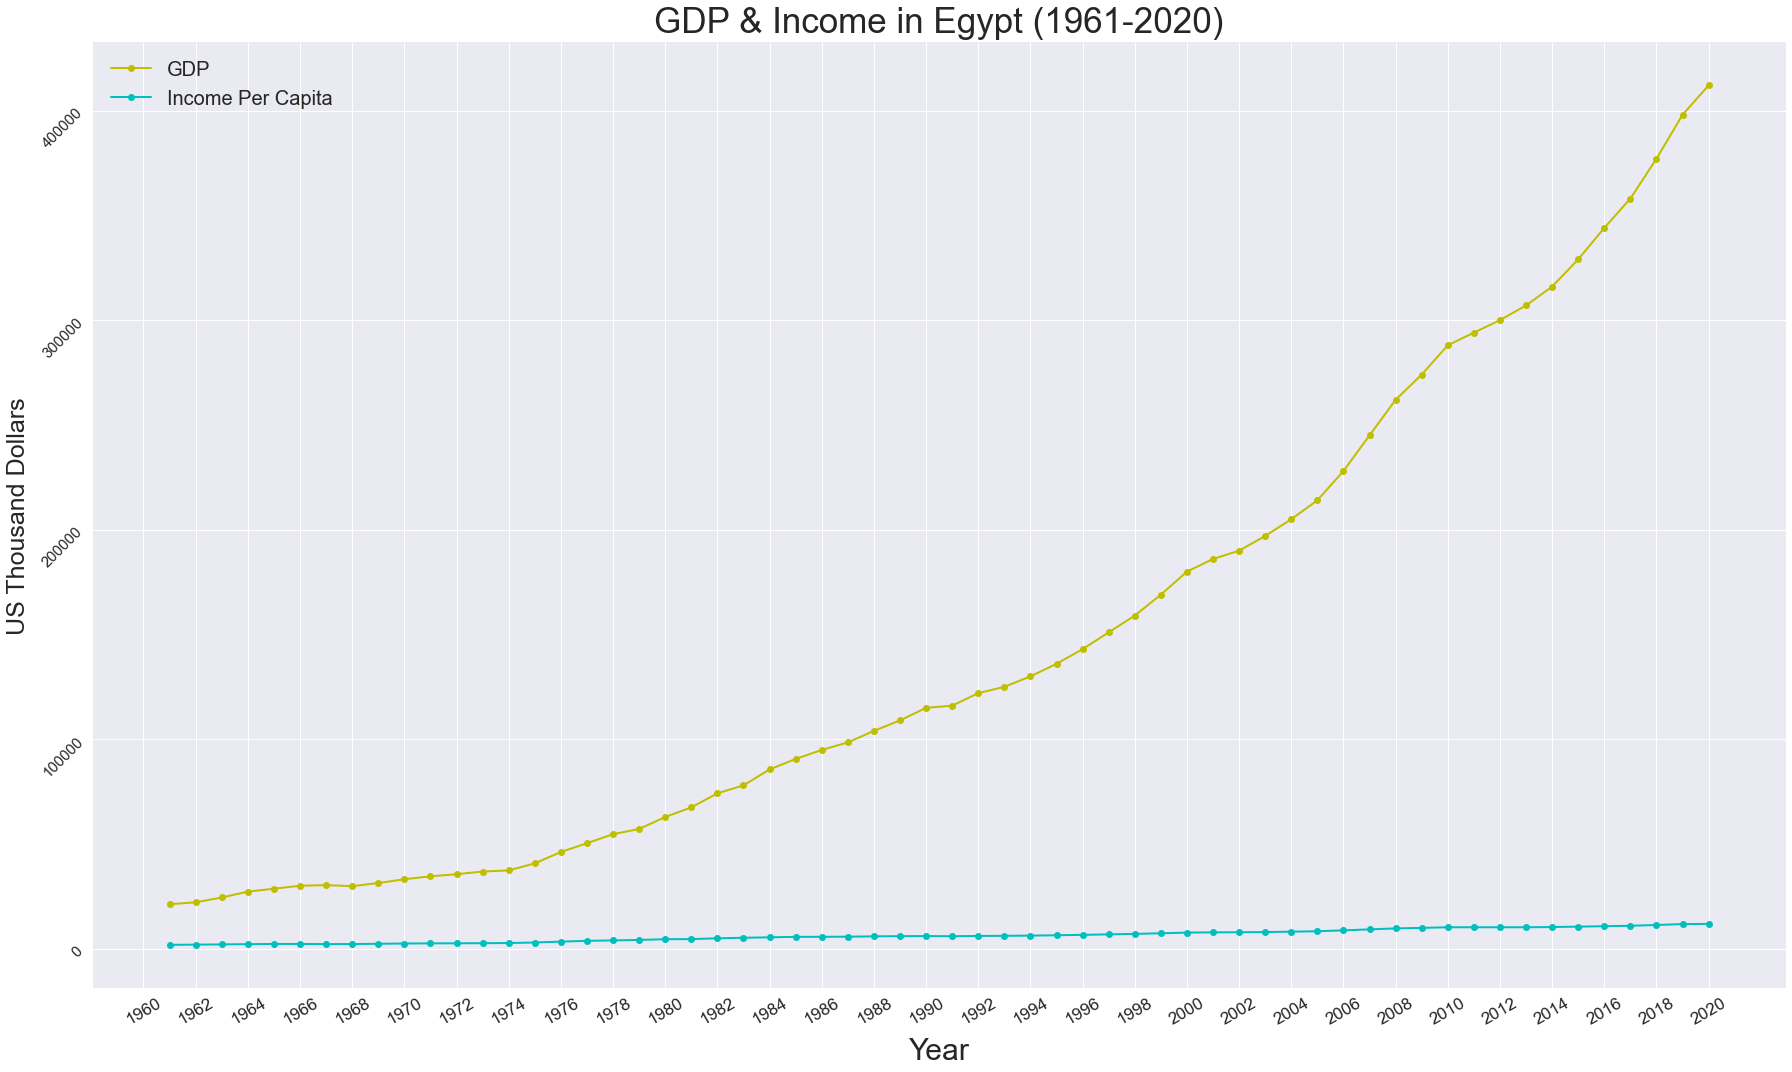

In [21]:
plt.style.use('seaborn')

plt.figure(figsize=(25,15))

gdp_series = plt.plot(df.year, df.GDP_thousands, linestyle='solid', lw=2, color="y",  marker='o', label='GDP')
income_series = plt.plot(df.year, df.income, linestyle='solid', lw=2,  marker='o', color="c", label='Income Per Capita')

plt.title('GDP & Income in Egypt (1961-2020)', fontsize=35, pad=10)
plt.xlabel('Year', fontsize=30, labelpad=10)
plt.ylabel('US Thousand Dollars', fontsize=25, labelpad=10)

plt.yticks(rotation=45, fontsize=15)
plt.xticks(years, rotation=30, fontsize=17)

plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

- There's a high correlation between GDP and Per Capita Income. And it only makes sense because Income is derived from GDP.
- It's crystal clear that the person's income and country's gross domestic product in Egypt, in spite of going hand in hand, are drifting apart with an increasing rate over years 1961-2020, which makes sense since population grows in an exponential manner.

#### Income & Income Inequality

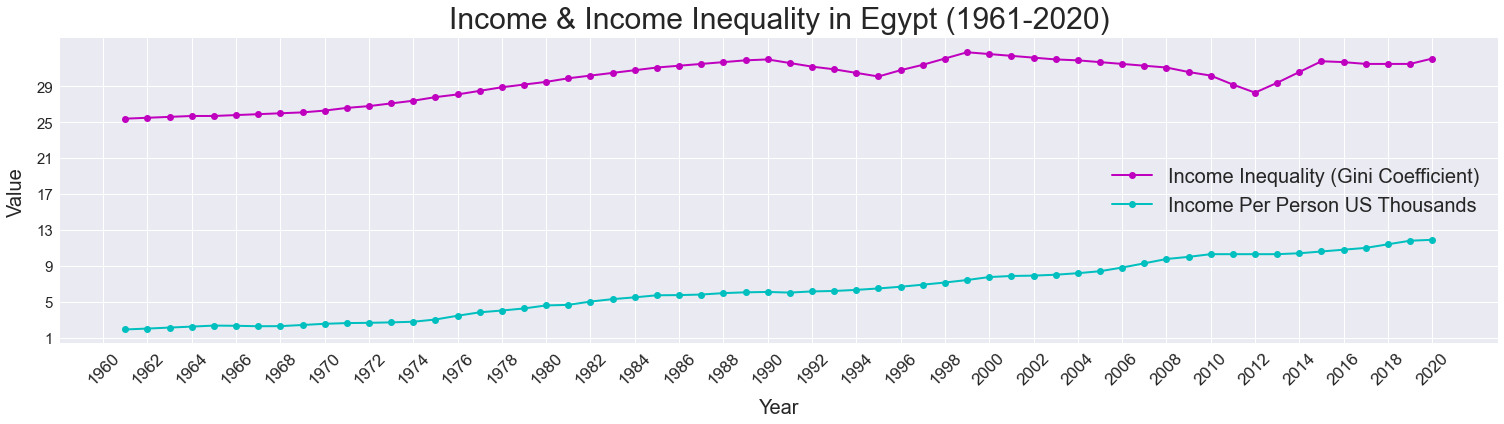

In [77]:
plt.style.use('seaborn')

plt.figure(figsize=(21,6))

income_decimal = df.income.apply(lambda x: x/1000)  #to show differences clearly
gini_series = plt.plot(df.year, df.gini_coefficient, linestyle='solid', lw=2, color="m",  marker='o', label='Income Inequality (Gini Coefficient)')
income_series = plt.plot(df.year, income_decimal, linestyle='solid', lw=2,  marker='o', color="c", label='Income Per Person US Thousands')

plt.title('Income & Income Inequality in Egypt (1961-2020)', fontsize=30, pad=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Value', fontsize=20, labelpad=10)

ticks = np.arange(1, 33, 4)
plt.yticks(ticks, fontsize=15)
plt.xticks(years, rotation=45, fontsize=17)

plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

It's important before interpreting the graph, to note here that Income Per Capita is measured in thousands of USD, while on the other hand, Income Inequality is measured by a specific formula and ranges from 0 to 100 points.

We can notice that as income per person increases, income inequality increases too with some exceptions, like in years:

- **2012**: the lowest income inequality level after the 25th of January revolution.
- **1995**: the second lowest point, when a new economic reformation program was applied.

#### Income & Inflation

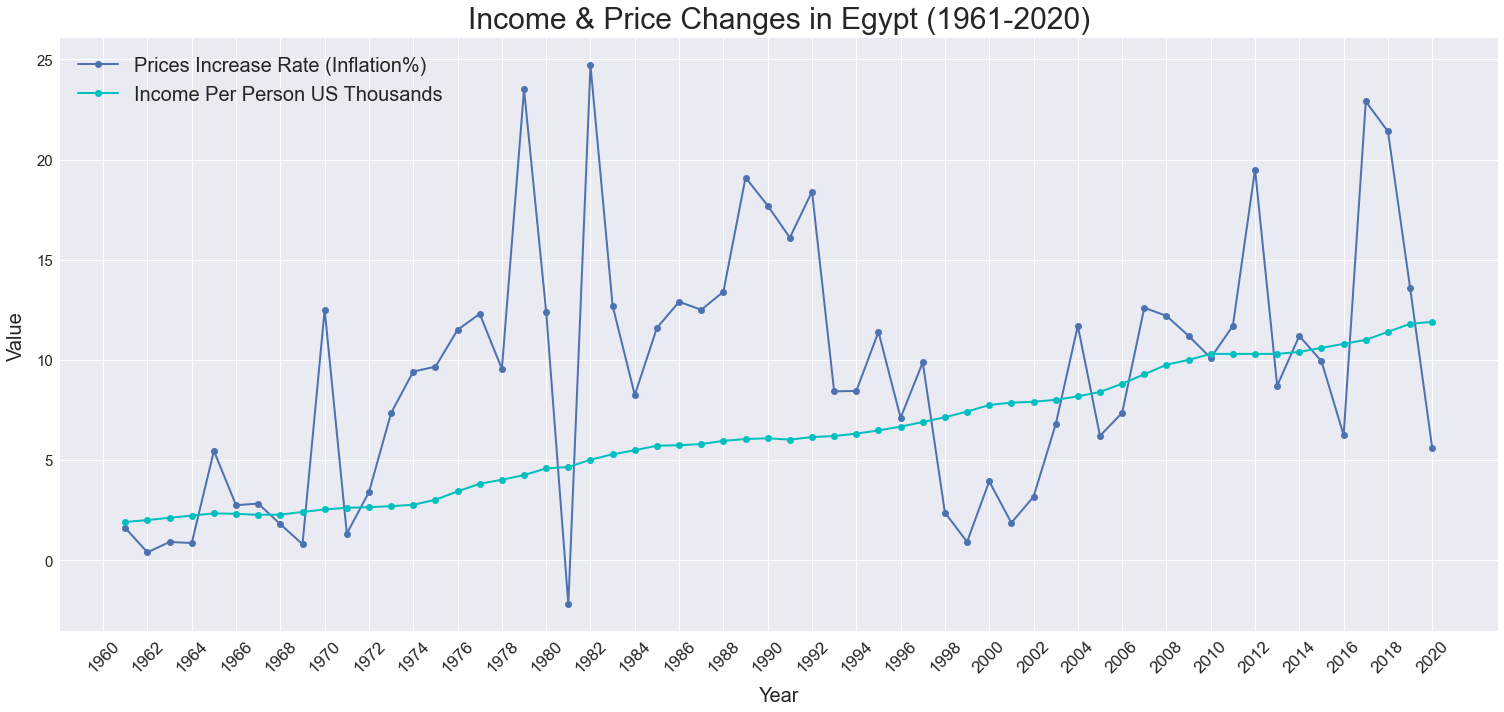

In [79]:
plt.style.use('seaborn')

plt.figure(figsize=(21,10))

income_decimal = df.income.apply(lambda x: x/1000)  #to show differences clearly
inflation_series = plt.plot(df.year, df.inflation, linestyle='solid', lw=2,  marker='o', label='Prices Increase Rate (Inflation%)')
income_series = plt.plot(df.year, income_decimal, linestyle='solid', lw=2,  marker='o', color="c", label='Income Per Person US Thousands')

plt.title('Income & Price Changes in Egypt (1961-2020)', fontsize=30, pad=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Value', fontsize=20, labelpad=10)

# ticks = np.arange(1, 33, 4)
plt.yticks(fontsize=15)
plt.xticks(years, rotation=45, fontsize=17)

plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

It's equally important here as well before interpreting results, to notice the difference in scales & measurements between Income Per Capita (thousands of USD) and Inflation rate (GDP Deflator as a percentage of GDP).

We can see that in spite of income, inflation is higly volatile and unsettled over years 1961-2020 in Egypt, as it fluctuates a lot, in spite of the growing income.

<a id='conclusions'></a>
## 4. Conclusions

### 4.1. Limitations

- Economics is a social science, meaning that much of the field is based on human behavior, which can be somewhat irrational and unpredictable. So numbers don't always represent facts.
- For a time series descriptive analysis, a longer period of years is preferable, however this project investigated a 21-year period due to the unavailability of some key indicators for other years.
- Theoritically, employment rate is criticized when used as an indication of labor market health since it doesn’t take into account working conditions, earning power or time worked.

### 4.2. Tentative Observations
With that said, this project tackled the main economic indicators of Egypt in 1991-2015 in order to notice how stable was the Egyptian economy during that period. It was shown that:
- 1. Certain waves of fluctuations exist over the years in the economy.
- 2. These waves are within a *very short range; almost fixed* for Employment rate and Balance of Trade.
- 3. While they get of a *medium range* as for GDP growth and Net Investment percentage of GDP.
- 4. And finally the waves are of a *very high range* regarding Inflation rate, indicating a relatively unstable prices.

In short, the Egyptian economy as a whole is relatively unstable, yet moving in an upward trend. Working on stabilizing the prices is the number one priority for the Egyptian economy to grow more steadily since prices are the most unstable key indicator, and since in economic theory, their stabilization has an immense effect on the whole economy development. Using a well-planned monetary policy shall be a good start. Finally, it must be noted that this project analysis does not imply that one change causes another based on a correlation.

### 4.3. Sources
- https://www.gapminder.org/data/
- https://www.economicsonline.co.uk/Global_economics/Policies_for_stability_and_growth.html
- https://www.eestipank.ee/en/monetary-policy/importance-price-stability
- https://data.oecd.org/emp/employment-rate.htm
- https://www.enotes.com/homework-help/what-is-the-relation-between-inflation-and-2406165
- https://www.enterprise-development.org/what-works-and-why/evidence-framework/link-between-employment-and-economic-growth/
- https://www.imf.org/external/pubs/ft/fandd/basics/monpol.htm
- https://www.thebalance.com/what-is-the-gdp-growth-rate-3306016